In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\win10\Downloads\tips.csv')

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
# Convert categorical variables to dummy variables (one-hot encoding) and convert them to int type
df= pd.get_dummies(df, columns=['sex','smoker','day','time'], drop_first=True).astype(int)

In [11]:
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16,1,2,0,0,0,1,0,0
1,10,1,3,1,0,0,1,0,0
2,21,3,3,1,0,0,1,0,0
3,23,3,2,1,0,0,1,0,0
4,24,3,4,0,0,0,1,0,0


In [15]:
# Define a list of numerical columns to check for outliers
numerical_cols = ['total_bill', 'tip', 'size']

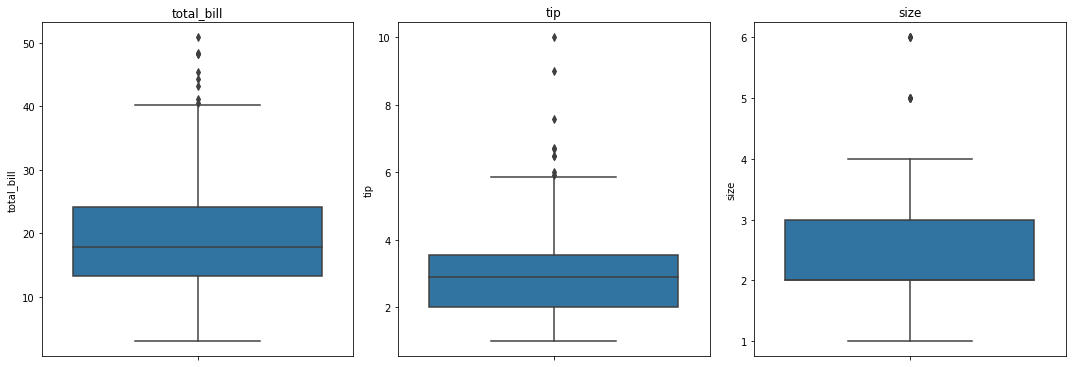

In [16]:
# Plotting boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [18]:
# Split the dataset into training and testing sets
X = df.drop('tip', axis=1)  # Features (drop the column you're predicting)
y = df['tip']               # Target variable (the column you're predicting)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Check the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(195, 6) (49, 6) (195,) (49,)
